In [62]:
import numpy as np
import pandas as pd
from utilities import *
import os
import glob

import matplotlib.pyplot as plt

## RpRn

In [57]:
# use to find Rp and Rn
c = {'gain': 1} # set driver gain
Ib = func_to_ibias(20e-3, n = 4) # Vpp displayed in function generator and number of channels it goes to
I_super = to_ADC(np.array([0.28, 0.067, 0.67, 0.810])/2, config = c) # set amplitude of superconducting signal
I_normal = to_ADC(np.array([101e-3, 50e-3, 89e-3, 104e-3])/2, config = c) # set amplitude of normal signal

print('Rp', get_Rp(Ib, I_super))
print('Rn', get_Rn(Ib, I_super, I_normal))

Rp [ 0.03714286  0.21880597  0.0038806  -0.00024691]
Rn [0.10127298 0.08119403 0.15589468 0.13409307]


SC:
A: 7.557 Vpp
B: 19.67 Vpp
C: 27.21 Vpp

Normal:
A: 3.142 Vpp
B: 3.474 Vpp
C: 3.68 Vpp

Tc:
A: 133.6 mK (101/108 mK)
B: 79 mK (68.1 mK)
C: 129.7 mK (80.384 mK)

Rp [ 0.0076162  -0.00939015 -0.01233019]
Rn [0.03880507 0.04946375 0.04904096]

***gain calibration***

measurements taken with 0.5-ohm calibration device (with ~5 cm total of manganin wire) connected from QET bias to return

picoscope plugged in directly from breakout box

`Vb` is the peak-to-peak amplitude from the function generator (triangle wave)

`Vpicos` are the voltage measured with "amplitude" measure of picoscope in volts (equivalent to by-eye vertical range of triangle wave response)

`gains` are the digital gains set in the `FEBV2Ponly` VI

In [ ]:
gains = np.array([1, 1.43, 2, 5, 10, 14.3, 20, 50]) # gain values
Vpicos = np.array([12.5, 17.3, 25, 60, 120, 165, 250, 630])*1e-3 # voltage read by picoscope [Vpp]

Vb = 20e-3 # Vbias (source from func gen)

Ib = func_to_ibias(Vb, n = 1) # bias current [A], one channel
Is = np.array([to_ADC(V, config = {'gain': G}) for V, G in zip(Vpicos, gains)]) # QET-line current [A]

Rs = get_Rp(Ib, Is) # ohms
print(Rs)

[0.71142857 0.73573906 0.71142857 0.74190476 0.74190476 0.77238095
 0.71142857 0.70562358]


Text(0, 0.5, 'resistance (ohms)')

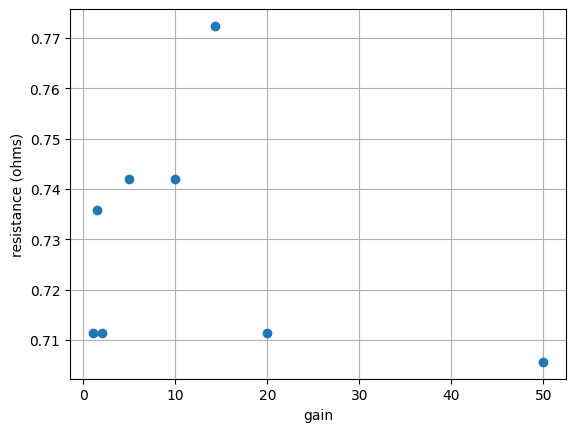

In [63]:
plt.figure()
plt.grid()
plt.plot(gains, Rs, 'o')
plt.xlabel('gain')
plt.ylabel('resistance (ohms)')